## Exploratory Data Analysis

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Config: display 200 columns when printing dataset
pd.set_option("display.max_columns", 200)

# Importing to avoid warning when ploting data
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

**Import data and converting index to datetimeindex**

In [30]:
y = pd.read_csv('../data/grendene-cotacao.csv', index_col=0)
y.index = pd.to_datetime(y.index)
y.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 55 entries, 2005-12-31 to 2019-06-30
Data columns (total 1 columns):
Abertura proximo mes    55 non-null float64
dtypes: float64(1)
memory usage: 880.0 bytes


In [31]:
X = pd.read_csv('../data/grendene-indicadores-financeiros.csv', index_col=0)
X.index = pd.to_datetime(X.index)
X.head(2)

,LPA Lucro por Acao $,VPA Valor Patr por Acao$,Vendas por Acao $,EBITDA por Acao $,Divida Total Liquida $,Divida Total Bruta $,Divida Bruta / Atv Tt %,Divida Bruta / Pat Liq %,Divida Liq / Pat Liq %,Estr Cap (D/D+Pat Liq) %,EBIT / Divida Bruta %,EBIT / Divida Liquida %,EBIT / Desp Fin Brut x,EBIT / Desp Fin Liq x,Divida Bruta / Ebitda x,Divida liq / Ebitda x,Divida CP / Divida Tt %,Exigivel Tt / Ativo Tt %,Exigivel Tt / Pat Liq %,Exigivel Tt / Receita %,Ativo Fixo / Pat Liq %,Investimentos / Pat Lq %,Liquidez Geral x,Liquidez Corrente x,Liquidez Seca x,Capital de Giro $,Capital Employed $,Prazo Med Estoques(dias),Prazo Med Forneced(dias),Prazo Med Recebim (dias),Ciclo Financeiro (dias),Ciclo Operacional (dias),EBITDA $,LAIR + Desp Fin Liq $,Giro do Ativo x,Giro do Pat Liq x,Margem Bruta %,Margem EBIT (Operac) %,Margem Liquida %,Margem Ebitda %,ROA Rentab do Ativo %,ROE Rent Pat(pat final)%,ROE Rent Pat(pat medio)%,ROE Rent Pat (pat inic)%,ROIC (IC fim) %,ROIC (IC medio) %,ROIC (IC inicial) %,Invested Capital $,Rentab Invest Subsid %,Alavancagem Financ x,Alavancagem Operac x,Capex (incl invest) $,Depreciacao e amortiz $,Capex (inc inv)/Deprec %,Deprec / Imob e Intang %,Fluxo de caixa livre $
Trimestre,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2005-12-31,0.093772,0.947297,1.17377,0.170268,307976000.0,176130000.0,15.223819,20.658787,36.1,17.121660,71.764606,41.0,1.197573,27.743415,1.149366,2.0,14.353035,26.308261,35.700420,28.812194,21.232349,4.934158,3.068141,6.044046,5.416786,774362000.0,1.028697e+09,55.953193,9.285730,109.692700,156.360163,165.645893,153241000.0,126399000.0,0.913095,1.239073,41.350425,11.965149,7.988978,14.506060,7.294693,9.898929,10.600682,11.409525,15.318531,14.788252,14.293458,544591000.0,17.0,1.434441,3.287077,42941000.0,26842000.0,159.976902,15.845617,254085000.0
2006-03-31,0.099011,0.993100,1.15110,0.167978,429948000.0,179115000.0,15.011012,20.039942,48.1,16.694395,69.160595,28.8,1.112691,8.027281,1.184780,2.8,14.675488,25.094534,33.501606,28.903175,19.647904,4.475884,3.264853,6.616855,6.059050,823459000.0,1.072905e+09,48.486224,7.947337,88.797846,129.336733,137.284069,151180000.0,123877000.0,0.868228,1.159098,41.391616,11.957355,8.601434,14.592805,7.468003,9.969903,10.665227,11.464809,17.626437,17.154743,16.707637,463842000.0,24.4,1.614638,3.214032,34624000.0,27303000.0,126.813903,15.847762,244201000.0


**Joining input and output to a single df**

In [32]:
data_df = X
data_df['Abertura proximo mes'] = y['Abertura proximo mes']
data_df.head(2)

,LPA Lucro por Acao $,VPA Valor Patr por Acao$,Vendas por Acao $,EBITDA por Acao $,Divida Total Liquida $,Divida Total Bruta $,Divida Bruta / Atv Tt %,Divida Bruta / Pat Liq %,Divida Liq / Pat Liq %,Estr Cap (D/D+Pat Liq) %,EBIT / Divida Bruta %,EBIT / Divida Liquida %,EBIT / Desp Fin Brut x,EBIT / Desp Fin Liq x,Divida Bruta / Ebitda x,Divida liq / Ebitda x,Divida CP / Divida Tt %,Exigivel Tt / Ativo Tt %,Exigivel Tt / Pat Liq %,Exigivel Tt / Receita %,Ativo Fixo / Pat Liq %,Investimentos / Pat Lq %,Liquidez Geral x,Liquidez Corrente x,Liquidez Seca x,Capital de Giro $,Capital Employed $,Prazo Med Estoques(dias),Prazo Med Forneced(dias),Prazo Med Recebim (dias),Ciclo Financeiro (dias),Ciclo Operacional (dias),EBITDA $,LAIR + Desp Fin Liq $,Giro do Ativo x,Giro do Pat Liq x,Margem Bruta %,Margem EBIT (Operac) %,Margem Liquida %,Margem Ebitda %,ROA Rentab do Ativo %,ROE Rent Pat(pat final)%,ROE Rent Pat(pat medio)%,ROE Rent Pat (pat inic)%,ROIC (IC fim) %,ROIC (IC medio) %,ROIC (IC inicial) %,Invested Capital $,Rentab Invest Subsid %,Alavancagem Financ x,Alavancagem Operac x,Capex (incl invest) $,Depreciacao e amortiz $,Capex (inc inv)/Deprec %,Deprec / Imob e Intang %,Fluxo de caixa livre $,Abertura proximo mes
Trimestre,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2005-12-31,0.093772,0.947297,1.17377,0.170268,307976000.0,176130000.0,15.223819,20.658787,36.1,17.121660,71.764606,41.0,1.197573,27.743415,1.149366,2.0,14.353035,26.308261,35.700420,28.812194,21.232349,4.934158,3.068141,6.044046,5.416786,774362000.0,1.028697e+09,55.953193,9.285730,109.692700,156.360163,165.645893,153241000.0,126399000.0,0.913095,1.239073,41.350425,11.965149,7.988978,14.506060,7.294693,9.898929,10.600682,11.409525,15.318531,14.788252,14.293458,544591000.0,17.0,1.434441,3.287077,42941000.0,26842000.0,159.976902,15.845617,254085000.0,1.164605
2006-03-31,0.099011,0.993100,1.15110,0.167978,429948000.0,179115000.0,15.011012,20.039942,48.1,16.694395,69.160595,28.8,1.112691,8.027281,1.184780,2.8,14.675488,25.094534,33.501606,28.903175,19.647904,4.475884,3.264853,6.616855,6.059050,823459000.0,1.072905e+09,48.486224,7.947337,88.797846,129.336733,137.284069,151180000.0,123877000.0,0.868228,1.159098,41.391616,11.957355,8.601434,14.592805,7.468003,9.969903,10.665227,11.464809,17.626437,17.154743,16.707637,463842000.0,24.4,1.614638,3.214032,34624000.0,27303000.0,126.813903,15.847762,244201000.0,0.902348


In [33]:
data_df.describe()

,LPA Lucro por Acao $,VPA Valor Patr por Acao$,Vendas por Acao $,EBITDA por Acao $,Divida Total Liquida $,Divida Total Bruta $,Divida Bruta / Atv Tt %,Divida Bruta / Pat Liq %,Divida Liq / Pat Liq %,Estr Cap (D/D+Pat Liq) %,EBIT / Divida Bruta %,EBIT / Divida Liquida %,EBIT / Desp Fin Brut x,EBIT / Desp Fin Liq x,Divida Bruta / Ebitda x,Divida liq / Ebitda x,Divida CP / Divida Tt %,Exigivel Tt / Ativo Tt %,Exigivel Tt / Pat Liq %,Exigivel Tt / Receita %,Ativo Fixo / Pat Liq %,Investimentos / Pat Lq %,Liquidez Geral x,Liquidez Corrente x,Liquidez Seca x,Capital de Giro $,Capital Employed $,Prazo Med Estoques(dias),Prazo Med Forneced(dias),Prazo Med Recebim (dias),Ciclo Financeiro (dias),Ciclo Operacional (dias),EBITDA $,LAIR + Desp Fin Liq $,Giro do Ativo x,Giro do Pat Liq x,Margem Bruta %,Margem EBIT (Operac) %,Margem Liquida %,Margem Ebitda %,ROA Rentab do Ativo %,ROE Rent Pat(pat final)%,ROE Rent Pat(pat medio)%,ROE Rent Pat (pat inic)%,ROIC (IC fim) %,ROIC (IC medio) %,ROIC (IC inicial) %,Invested Capital $,Rentab Invest Subsid %,Alavancagem Financ x,Alavancagem Operac x,Capex (incl invest) $,Depreciacao e amortiz $,Capex (inc inv)/Deprec %,Deprec / Imob e Intang %,Fluxo de caixa livre $,Abertura proximo mes
count,55.000000,55.000000,55.000000,55.000000,5.500000e+01,5.500000e+01,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,5.500000e+01,5.500000e+01,55.000000,55.000000,55.000000,55.000000,55.000000,5.500000e+01,5.500000e+01,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,5.500000e+01,55.000000,55.000000,55.000000,5.500000e+01,5.500000e+01,55.000000,55.000000,5.500000e+01,55.000000
mean,0.422502,2.207155,1.920597,0.382768,8.120089e+08,1.483202e+08,7.582139,9.530619,41.996364,8.301728,296.544423,42.750909,3.179685,8.291007,0.527072,2.445455,58.363065,15.809551,19.466193,20.510411,13.211276,2.596819,6.272898,7.031472,6.307432,1.533667e+09,2.141186e+09,67.852748,11.424510,112.399486,168.827725,180.252235,3.450017e+08,3.081595e+08,0.772610,0.925333,44.744089,17.422844,20.695234,19.509570,15.613311,18.354207,19.323947,20.414941,18.593271,19.402647,20.488023,1.180857e+09,38.178665,1.636295,2.549384,7.264347e+07,3.684222e+07,183.332193,14.286953,2.685564e+08,3.597328
std,0.202291,0.869778,0.475797,0.131343,3.696917e+08,6.807302e+07,5.347223,7.552951,11.281400,5.913216,241.727769,20.207982,2.014545,12.599190,0.385079,0.849143,22.908597,6.245707,9.467969,7.664019,2.377265,0.981592,2.153406,1.714528,1.504817,4.996697e+08,7.650995e+08,12.672321,2.730025,20.352565,22.675326,23.702268,1.185572e+08,1.061766e+08,0.104697,0.155804,2.576497,2.632805,6.468661,2.727319,4.184918,4.246470,4.492204,4.802978,4.646469,4.947701,5.671187,5.425970e+08,46.616125,0.259136,0.369027,4.886559e+07,1.495961e+07,95.224127,1.199345,1.133395e+08,2.503221
min,0.093772,0.947297,1.136898,0.167978,3.079760e+08,2.521900e+07,1.204284,1.343705,16.300000,1.325889,59.281074,17.800000,1.005855,1.217904,0.080045,0.900000,14.353035,7.600365,8.225536,10.513180,10.215064,1.239122,2.773394,4.339955,3.866314,7.743620e+08,1.028697e+09,48.486224,6.969357,71.214078,119.417460,129.766277,1.511800e+08,1.238770e+08,0.549327,0.623304,38.450072,11.957355,7.988978,14.506060,7.294693,9.898929,10.600682,11.234531,11.812623,12.072613,11.446675,4.638420e+08,0.500000,1.205590,2.068983,1.219500e+07,1.953500e+07,44.827087,11.967661,1.623500e+07,0.723135
25%,0.278425,1.491748,1.541123,0.264210,5.233115e+08,1.013870e+08,3.430279,3.842131,36.000000,3.699973,128.279669,30.500000,1.481554,1.981422,0.240809,1.850000,43.410867,10.469318,11.693675,14.002840,11.287728,1.632718,4.190882,5.730377,5.202967,1.213430e+09,1.544248e+09,57.721718,9.488763,97.165855,152.867776,163.287181,2.381425e+08,2.100680e+08,0.703847,0.804983,43.117348,15.551151,16.458603,17.345325,13.503998,15.33532

### Scatterplot and Histograms

We will start by creating a scatterplot matrix that will allow us to visualize the pair-wise relationships and correlations between the different features.

It is also quite useful to have a quick overview of how the data is distributed and wheter it cointains or not outliers.

In [34]:
# Calculate and show pairplot

#sns.pairplot(data_df, height=2.5)
#plt.tight_layout()

    Results:

### Correlation Matrix

Create a correlation matrix to quantify and summarize the relationships between the variables.

This correlation matrix is closely related witn covariance matrix, in fact it is a rescaled version of the covariance matrix, computed from standardize features.

It is a square matrix (with the same number of columns and rows) that contains the Person’s r correlation coefficient.

In [35]:
#cols = data_df.columns
#fig, ax = plt.subplots(figsize=(50,50))

# Calculate and show correlation matrix
#cm = np.corrcoef(data_df.values.T)
#sns.set(font_scale=3)
#hm = sns.heatmap(cm,
#                cbar=True,
#                annot=True,
#                square=True,
#                fmt='.2f',
#                annot_kws={'size': 15},
#                yticklabels=cols,
#                xticklabels=cols,
#                ax=ax)

    Results: It's possible to observe that some features have a high correlation with the output "Abertura proximo mes"

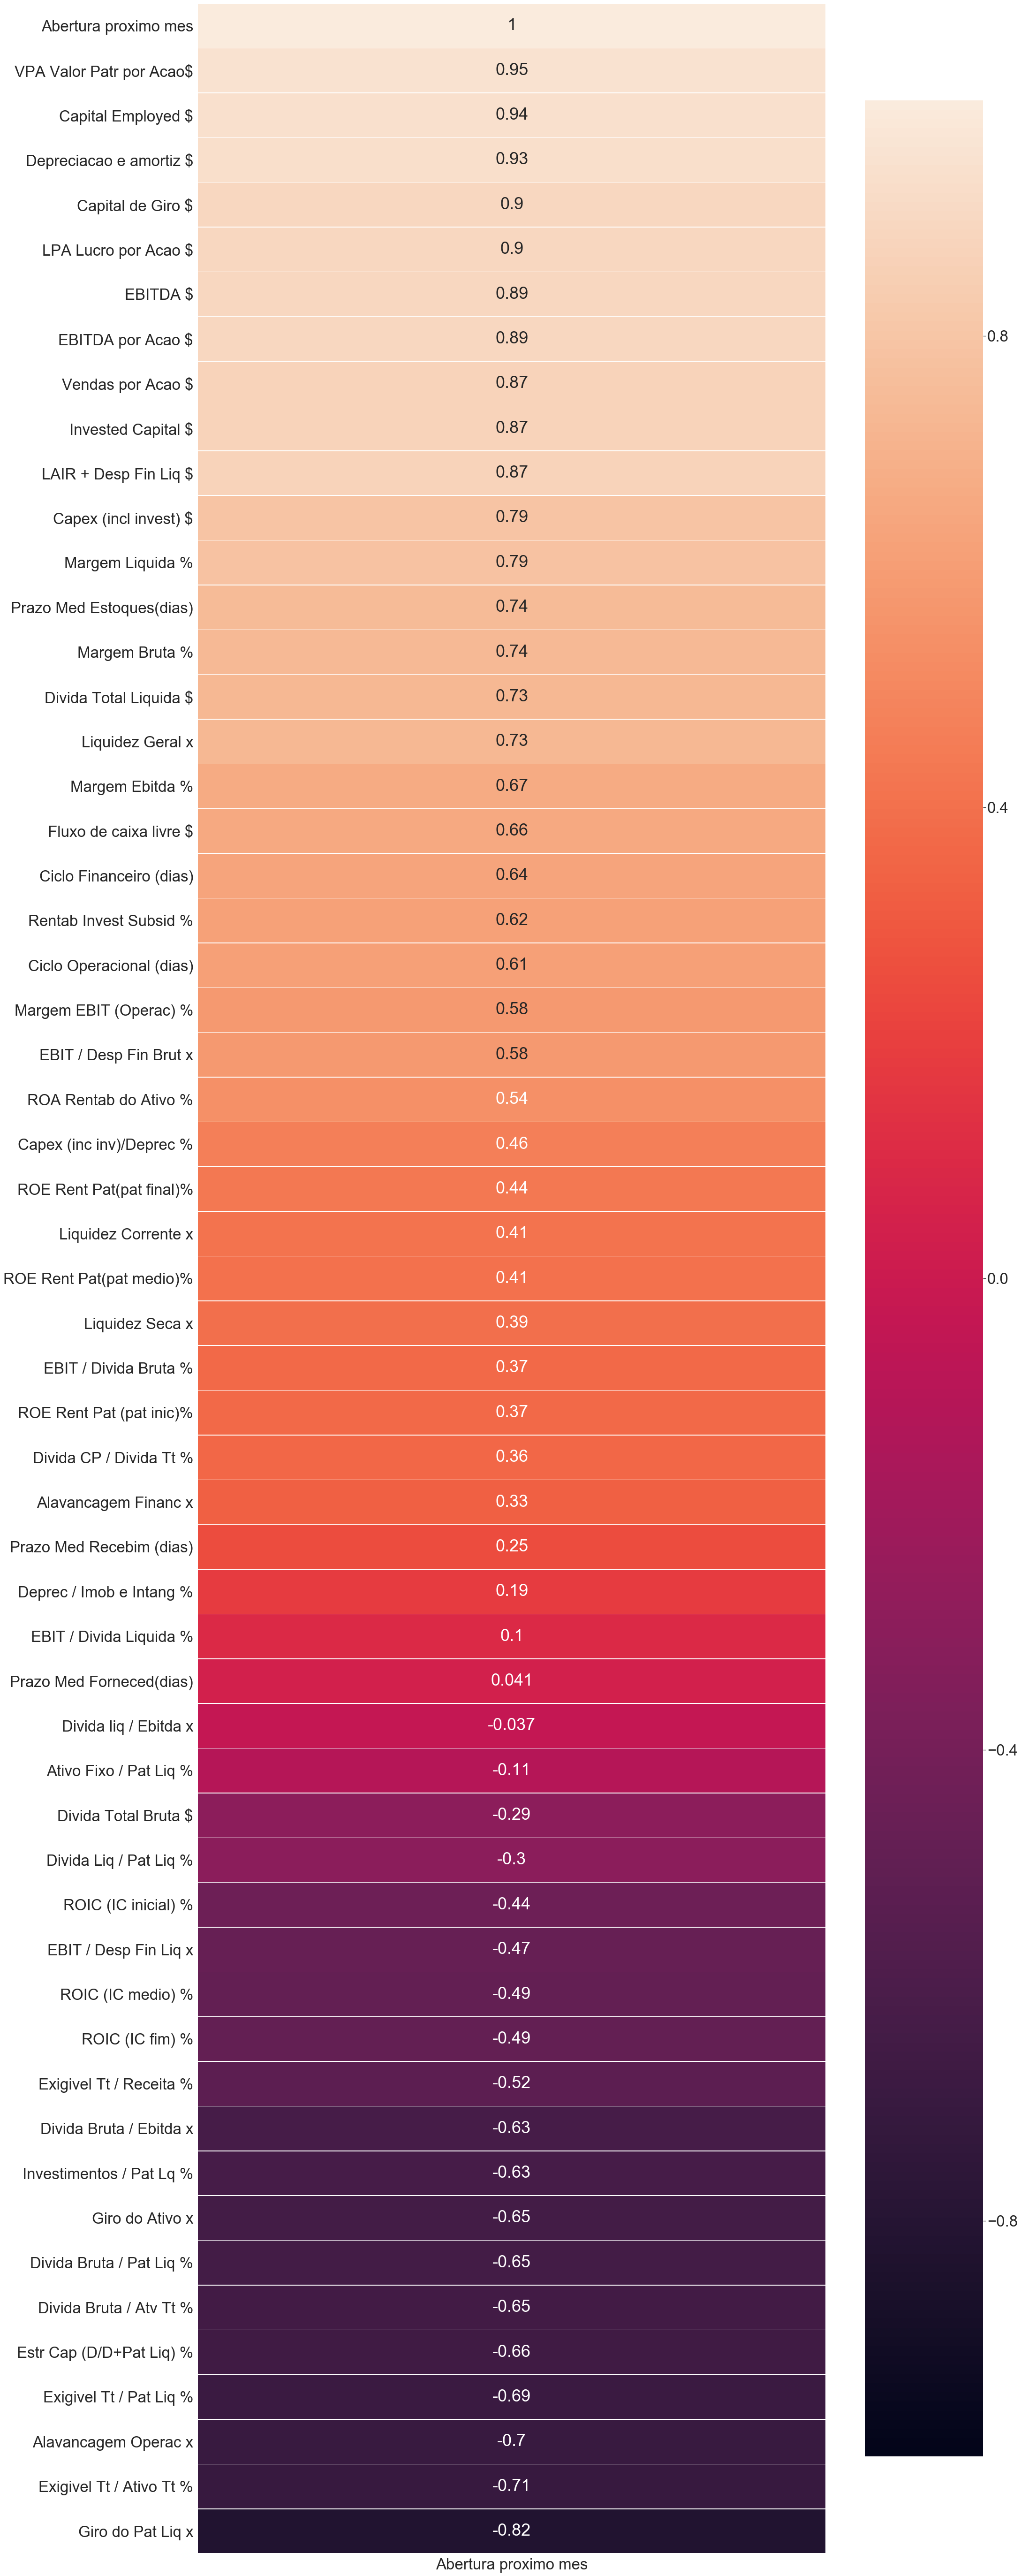

In [39]:
fig, ax = plt.subplots(figsize=(30,100))
sns.set(font_scale=3)
hm2 = sns.heatmap(data_df.corr()[['Abertura proximo mes']].sort_values(by=['Abertura proximo mes'],ascending=False), annot=True, vmin=-1, vmax=1, linewidths=.5)

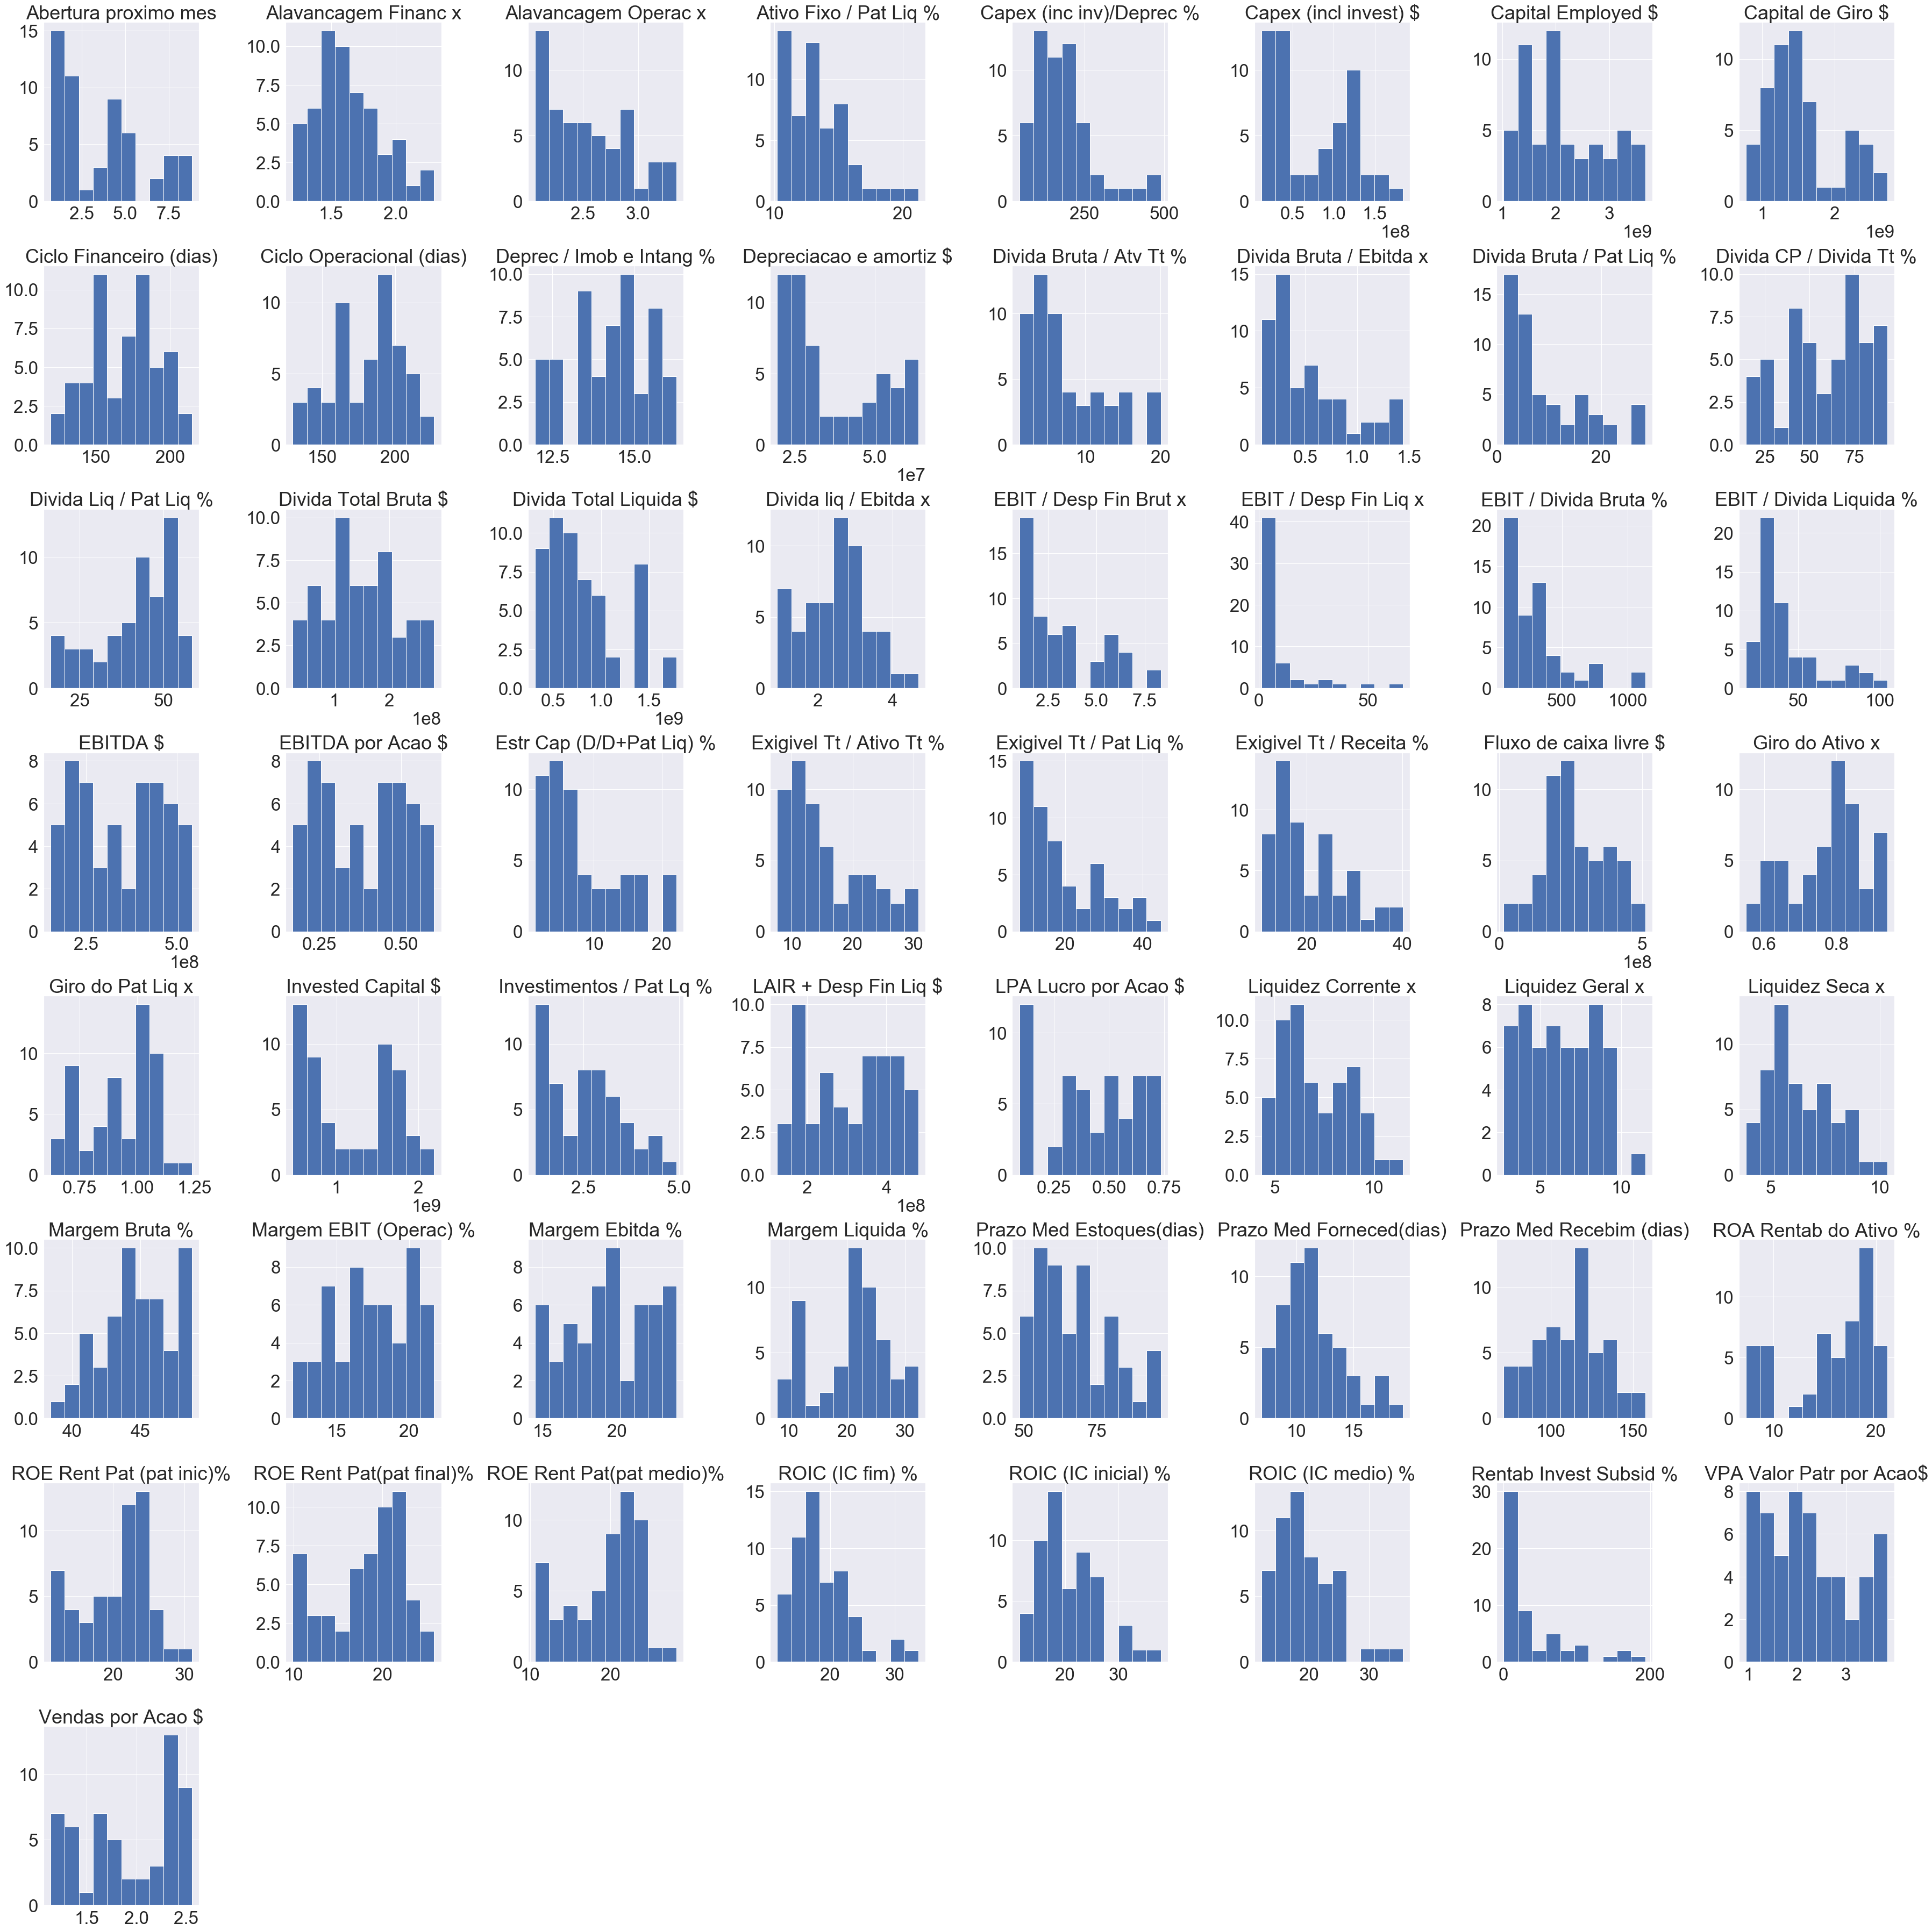

In [37]:
data_df.hist(figsize=(50, 50))
plt.tight_layout()

In [38]:
# Imports 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# scale the stock price
ss_price = StandardScaler()
y_train = ss_price.fit_transform(y_train)
y_test = ss_price.transform(y_test)